# Proteomics visualizations
In this notebook, we'll visualize our differentially abundant proteins and perform set operations to identify candidate proteins. We'll then compare these results to the transcriptomics to try and further narrow down meaningful candidate genes.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from upsetplot import plot
from os import listdir
from os.path import splitext
from functools import reduce

## Read in the data

In [5]:
two_vs_21 = pd.read_csv('../data/proteomics/2_vs_21_CORRECT_ORDER_de_results_median_permutation_test.csv', header=4)
two_vs_21.head()

,#,Visible?,Starred?,Identified Proteins (5249),Accession Number,Alternate ID,Molecular Weight,Protein Grouping Ambiguity,Permutation Test (p-value) Benjamini-Hochberg (p < 0.00297),Log? Fold Change by Category (Set 2 / Set 21),...,21D,Std Dev Log? Fold Change(21D),40A,Std Dev Log? Fold Change(40A),40B,Std Dev Log? Fold Change(40B),40C,Std Dev Log? Fold Change(40C),40D,Std Dev Log? Fold Change(40D)
0,1,True,Empty,Cluster of Ribulose bisphosphate carboxylase l...,O03042 [2],rbcL,53 kDa,True,0.22,0.02,...,-0.0568,0.243706,0.0446,0.254799,-0.0373,0.273446,0.0432,0.257441,-0.0526,0.239898
1,2,True,Empty,Cluster of Ribulose bisphosphate carboxylase s...,B3H5S2 [2],RBCS3B,21 kDa,True,0.46,-0.06,...,0.0599,0.275499,0.1184,0.238075,0.0576,0.295961,0.0024,0.241662,0.0181,0.257044
2,3,True,Empty,"ATP synthase subunit beta, chloroplastic OS=Ar...",P19366,atpB,54 kDa,True,0.84,0.01,...,-0.0304,0.261425,0.0287,0.237563,-0.1041,0.262003,0.0041,0.257266,-0.0169,0.225745
3,4,True,Empty,Cluster of Oxygen-evolving enhancer protein 1-...,P23321 [2],PSBO1,35 kDa,True,0.71,0.06,...,0.0221,0.240187,0.0414,0.254064,-0.1304,0.254778,-0.1248,0.241371,-0.0471,0.240903
4,5,True,Empty,Ribulose bisphosphate carboxylase/oxygenase ac...,P10896,RCA,52 kDa,NaN,0.091,-0.01,...,0.053,0.259930,0.1089,0.269922,0.0149,0.251194,-0.0097,0.246817,0.0022,0.233749


In [6]:
forty_vs_21 = pd.read_csv('../data/proteomics/40_vs_21_CORRECT_ORDER_de_results_median_permutation_test.csv', header=4)
forty_vs_21.head()

,#,Visible?,Starred?,Identified Proteins (5249),Accession Number,Alternate ID,Molecular Weight,Protein Grouping Ambiguity,Permutation Test (p-value) Benjamini-Hochberg (p < 0.00553),Log? Fold Change by Category (Set 40 / Set 21),...,21D,Std Dev Log? Fold Change(21D),40A,Std Dev Log? Fold Change(40A),40B,Std Dev Log? Fold Change(40B),40C,Std Dev Log? Fold Change(40C),40D,Std Dev Log? Fold Change(40D)
0,1,True,Empty,Cluster of Ribulose bisphosphate carboxylase l...,O03042 [2],rbcL,53 kDa,True,0.9,0.01,...,-0.0568,0.243706,0.0446,0.254799,-0.0373,0.273446,0.0432,0.257441,-0.0526,0.239898
1,2,True,Empty,Cluster of Ribulose bisphosphate carboxylase s...,B3H5S2 [2],RBCS3B,21 kDa,True,0.46,-0.06,...,0.0599,0.275499,0.1184,0.238075,0.0576,0.295961,0.0024,0.241662,0.0181,0.257044
2,3,True,Empty,"ATP synthase subunit beta, chloroplastic OS=Ar...",P19366,atpB,54 kDa,True,0.002,-0.04,...,-0.0304,0.261425,0.0287,0.237563,-0.1041,0.262003,0.0041,0.257266,-0.0169,0.225745
3,4,True,Empty,Cluster of Oxygen-evolving enhancer protein 1-...,P23321 [2],PSBO1,35 kDa,True,0.47,-0.04,...,0.0221,0.240187,0.0414,0.254064,-0.1304,0.254778,-0.1248,0.241371,-0.0471,0.240903
4,5,True,Empty,Ribulose bisphosphate carboxylase/oxygenase ac...,P10896,RCA,52 kDa,NaN,0.005,-0.04,...,0.053,0.259930,0.1089,0.269922,0.0149,0.251194,-0.0097,0.246817,0.0022,0.233749


In [14]:
two_lfc_name = 'Log? Fold Change by Category (Set 2 / Set 21)'
forty_lfc_name = 'Log? Fold Change by Category (Set 40 / Set 21)'
two_pval_col_name = "Permutation Test (p-value) Benjamini-Hochberg (p < 0.00297)"
forty_pval_col_name = "Permutation Test (p-value) Benjamini-Hochberg (p < 0.00553)"
two_pval_cutoff = 0.00297
forty_pval_cutoff = 0.00553

Do basic dataframe cleaning specific to the Scaffold output:

In [11]:
two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].replace('< 0.0001', '0.00009')
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].replace('< 0.0001', '0.00009')

two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].replace('--', np.nan)
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].replace('--', np.nan)

two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].astype('float64')
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].astype('float64')

Filter out any proteins that aren't significantly expressed in each condition:

In [12]:
initial_two_num = len(two_vs_21)
two_vs_21 = two_vs_21[two_vs_21[two_pval_col_name] < two_pval_cutoff]
print(f'There are {len(two_vs_21)} differentially expressed proteins at 2% oxygen, which is {(len(two_vs_21)/initial_two_num)*100:.2f}% of the total proteins.')

There are 277 differentially expressed proteins at 2% oxygen, which is 6.43% of the total proteins.


In [13]:
initial_forty_num = len(forty_vs_21)
forty_vs_21 = forty_vs_21[forty_vs_21[forty_pval_col_name] < forty_pval_cutoff]
print(f'There are {len(forty_vs_21)} differentially expressed proteins at 40% oxygen, which is {(len(forty_vs_21)/initial_forty_num)*100:.2f}% of the total proteins.')

There are 519 differentially expressed proteins at 40% oxygen, which is 12.05% of the total proteins.


Put the two dataframes in a dict to make later plotting easier:

In [16]:
df_references = {
    '2_vs_21': {'lfc_name': two_lfc_name, 'pval_col_name': two_pval_col_name, 'pval_cutoff': two_pval_cutoff},
    '40_vs_21': {'lfc_name': forty_lfc_name, 'pval_col_name': forty_pval_col_name, 'pval_cutoff': forty_pval_cutoff}
}

comparisons = {
    '2_vs_21': two_vs_21,
    '40_vs_21': forty_vs_21
}

## Basic characterization
Let's start by plotting some histograms of the log fold change for the significant proteins:

Text(0.5, 0.01, 'Log2FoldChange')

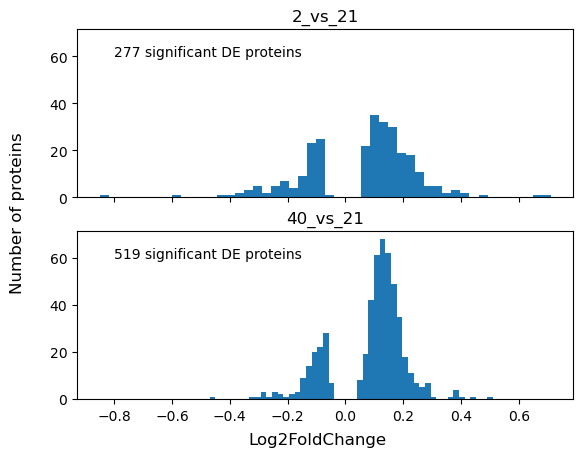

In [23]:
fig, axs = plt.subplots(2, sharex=True, sharey=True)

for comp, ax in zip(comparisons, axs):
    df = comparisons[comp]
    ax.hist(df[df_references[comp]['lfc_name']], bins=50)
    ax.set_title(comp)
    ax.text(-0.8, 60, f'{len(df)} significant DE proteins')

fig.supylabel('Number of proteins')
fig.supxlabel('Log2FoldChange')

## Set operations
We want to know which proteins exhibit opposite behavior at the two conditions.

In [47]:
two_forty = pd.merge(two_vs_21, forty_vs_21, left_on='Accession Number', right_on='Accession Number', suffixes=('_2o2', '_40o2'))
protein_opposites = two_forty[two_forty[two_lfc_name]*two_forty[forty_lfc_name] < 0]
protein_opposites.shape

(21, 85)

Only 21 proteins!

## Comparison to transcriptomic data
We now want to see if any of these proteins overlap with the candidates we saw in our transcriptomic analysis. To do this, we want to map the protein ID's to the TAIR ID's for the associated genes. TAIR provides a conversion file, so let's read that in:

In [29]:
id_map = pd.read_csv('../data/proteomics/TAIR2UniprotMapping.txt', sep='\t', names=['uniprot_id', 'locus', 'TAIR_id'])
id_map.head()

,uniprot_id,locus,TAIR_id
0,A0A0A7EPL0-2,locus:2035999,AT1G08910
1,A0A178UFM8,locus:2153097,AT5G51560
2,A0A178VEK7,locus:2103386,AT3G60460
3,A0A178WF56,locus:2205245,AT1G56060
4,A0A1I9LMX5,locus:2098695,AT3G50610


Remove extra characters that are a remnent of the Scaffold GUI:

In [50]:
protein_opposites.loc[:, "Accession Number clean"] = protein_opposites["Accession Number"].str.split('[').str[0].str.strip().str.split('(').str[0].str.strip()

Convert:

In [54]:
opposites_with_ids = pd.merge(protein_opposites, id_map, left_on='Accession Number clean', right_on='uniprot_id')[['Accession Number clean', 'TAIR_id', 'locus', two_pval_col_name, two_lfc_name, forty_pval_col_name, forty_lfc_name]]
opposites_with_ids.head()

,Accession Number clean,TAIR_id,locus,Permutation Test (p-value) Benjamini-Hochberg (p < 0.00297),Log? Fold Change by Category (Set 2 / Set 21),Permutation Test (p-value) Benjamini-Hochberg (p < 0.00553),Log? Fold Change by Category (Set 40 / Set 21)
0,O80448,AT2G38230,locus:2042932,0.00015,0.09,0.00063,-0.08
1,Q9SD76,AT3G46970,locus:2075576,0.00009,0.18,0.00009,-0.07
2,Q9SAC6,AT1G10760,locus:2019953,0.00009,0.07,0.00009,-0.08
3,Q9SAC6,AT1G10760,locus:2019953,0.00009,0.07,0.00009,-0.08
4,Q9SAC6,AT1G10760,locus:2019953,0.00009,0.07,0.00009,-0.08


Now we want to see what genes are here that appear in our transcriptomics candidate sets; we'll use an UpsetPlot to look at the general overlap. First we need to read in the transcriptomic gene lists and wrangle the data into the right format.

In [60]:
data_path = '../data/gene_lists_with_descriptions'
transcriptomic_comparisons = {}
for f in listdir(data_path):
    comp = splitext(f)[0]
    transcriptomic_comparisons[comp] = pd.read_csv(f'{data_path}/{f}')

We need a dataframe where the rows are genes, the columns are the categories and the values are True/False for whether or not a gene appears in the comparison. 